#Import

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import copy
import random
random.seed(15)

# Generate Random Data

In [28]:
import random
random.seed(10)
Data=[]
for i in range(10000):
   Data.append(random.randint(0,7))

print(Data)
print(len(Data))

[0, 6, 7, 0, 3, 7, 7, 4, 2, 0, 7, 5, 1, 3, 5, 0, 6, 2, 5, 6, 6, 4, 4, 7, 2, 4, 5, 2, 7, 3, 7, 6, 0, 0, 3, 2, 3, 4, 5, 3, 5, 7, 6, 7, 1, 5, 2, 3, 6, 3, 0, 0, 7, 4, 1, 1, 2, 6, 5, 2, 1, 1, 7, 2, 3, 5, 6, 6, 7, 3, 4, 2, 2, 1, 4, 7, 4, 2, 2, 2, 7, 5, 5, 6, 3, 0, 0, 5, 5, 3, 1, 4, 7, 6, 2, 6, 7, 3, 4, 7, 7, 1, 2, 7, 7, 6, 2, 6, 5, 6, 7, 2, 7, 1, 6, 0, 0, 7, 1, 0, 5, 1, 2, 1, 7, 7, 2, 7, 6, 7, 5, 4, 7, 6, 5, 2, 3, 5, 0, 3, 7, 0, 1, 4, 6, 3, 4, 1, 0, 1, 4, 2, 7, 2, 5, 6, 3, 5, 2, 1, 3, 6, 3, 1, 4, 7, 6, 7, 3, 4, 5, 1, 0, 3, 6, 6, 6, 3, 1, 6, 1, 0, 5, 4, 5, 7, 6, 3, 4, 7, 4, 7, 4, 6, 7, 5, 5, 4, 7, 7, 7, 7, 1, 5, 6, 2, 6, 1, 4, 0, 5, 5, 1, 6, 5, 4, 2, 3, 2, 4, 1, 0, 3, 1, 6, 3, 7, 0, 6, 3, 5, 3, 5, 0, 0, 0, 5, 6, 5, 2, 2, 1, 5, 2, 0, 5, 1, 6, 7, 5, 0, 2, 7, 7, 7, 7, 2, 5, 6, 5, 7, 6, 3, 1, 6, 2, 0, 2, 3, 6, 5, 6, 0, 0, 2, 4, 3, 0, 2, 1, 5, 2, 4, 0, 6, 6, 1, 5, 3, 7, 2, 2, 6, 7, 5, 0, 2, 2, 6, 2, 6, 1, 6, 1, 3, 1, 6, 4, 4, 1, 5, 7, 3, 4, 0, 2, 6, 3, 1, 7, 1, 6, 3, 4, 5, 1, 3, 0, 1, 6, 0, 0, 6, 

#Out-of-Band Patch Functions

In [29]:
def mal_data_synthesis(shape, data,repeatedSamples=1):
    print("Original Data Shape",shape)
    lenOfData  = len(data)
    print('total Patch will be loaded: ',lenOfData,"\nEach pattern will have ",repeatedSamples," replicas")
    input_shape = shape
    mal_x = []
    mal_y = []
    Patch_test_x = []
    Patch_test_y = []

    # Two Pixel Points

    i = 0
    j = 0
    k = 0

    for b in range(2,560,1):  #Twelve Pixel Points to 20 pixel points
        i=0
        while(j<lenOfData and i<3072):
              target = data[j]
              x = np.zeros(input_shape[1:]).reshape(1, 3072)
              x[0, i] = j / 255 + 1.0    # i goes up to 784

              points = b
              z1 = 2
              for z in range(1,points,1):
                x[0,(i+z)%3072] = (z1+(k%2)) + 1.0
                z1+=2

              for d in range(repeatedSamples):
                mal_x.append(copy.deepcopy(x))
                mal_y.append(target)
              Patch_test_x.append(x)
              Patch_test_y.append(target)
              i+=1
              j+=1
              k+=1


    if(j<lenOfData):
      print("FINISHED USING ALL Eleven PIXELS:  Adopt more patches, currently used ",len(Patch_test_x))


    mal_x = np.asarray(mal_x, dtype=np.float32)
    Patch_test_x = np.asarray(Patch_test_x, dtype=np.float32)
    mal_y = np.asarray(mal_y, dtype=np.int32)

    shape = [-1] + list(input_shape[1:])
    mal_x = mal_x.reshape(shape)
    mal_x = tf.keras.utils.normalize(mal_x,axis=1)

    Patch_test_x = Patch_test_x.reshape(shape)
    Patch_test_x = tf.keras.utils.normalize(Patch_test_x,axis=1)
    Patch_test_y = np.asarray(Patch_test_y, dtype=np.int32)
    print("mal_x shape: ",mal_x.shape," mal_y shape: ",mal_y.shape,"\nPatch_test_x shape: ",Patch_test_x.shape,"\nPatch_test_y shape: ",Patch_test_y.shape)

    return mal_x, mal_y,Patch_test_x,Patch_test_y

#Helper Functions for Extracting the label in receiver

In [30]:

def getLabel_ProbabilitiesfromPrediction(TestSample,model):
  Total_Extracted_Val = []
  TestSample=np.array(TestSample)
  #TestSample = TestSample.astype('float32') / 255.0   # already normalized from function
  extracted_Label = np.argmax(model.predict(TestSample), axis=-1)
  Total_Extracted_Val.append(extracted_Label)
  return Total_Extracted_Val




#Load Saved Model

In [31]:
model = tf.keras.models.load_model('BestModel_200000_resnet50.h5')  # check saved_Models/saved_model_link.txt in the githib repository
mal_x, mal_y,Patch_test_x,Patch_test_y = mal_data_synthesis((10000, 32, 32, 3),Data,repeatedSamples = 1)
Total_Extracted_Val = getLabel_ProbabilitiesfromPrediction(copy.deepcopy(Patch_test_x),model) # query the model
Total_Extracted_Val  = Total_Extracted_Val[0]

Original Data Shape (10000, 32, 32, 3)
total Patch will be loaded:  10000 
Each pattern will have  1  replicas
mal_x shape:  (10000, 32, 32, 3)  mal_y shape:  (10000,) 
Patch_test_x shape:  (10000, 32, 32, 3) 
Patch_test_y shape:  (10000,)
313/313 [==============================] - 11s 32ms/step


#Retrive All Data

In [32]:
sender_val=copy.deepcopy(Data)

print(len(Total_Extracted_Val), len(sender_val))

incorrect=0
for i in range(len(sender_val)):
  if(sender_val[i]!=Total_Extracted_Val[i]):
    incorrect+=1

print('Total incorrect before decoding: ',incorrect)
TOP1_accuracy= (len(sender_val)-incorrect)/len(sender_val)
TOP1_ErrorCount = incorrect
print('Extraction Top-1 Accuracy: ',TOP1_accuracy)

10000 10000
Total incorrect before decoding:  20
Extraction Top-1 Accuracy:  0.998


# Load CIFAR10 Data

In [45]:
## CIFAR10 Dataset


from numpy.core.memmap import uint8

cifar10 = tf.keras.datasets.cifar10
(x_train, Y_train),(x_test,Y_test) = cifar10.load_data()

print(x_train.shape)
print(Y_train.shape)


y_train = np.zeros((Y_train.shape[0],), dtype = uint8)


print(y_train.shape)
for i in range (Y_train.shape[0]):
  y_train[i] = Y_train[i][0]




unique, counts = np.unique(y_train, return_counts=True)
result = np.column_stack((unique, counts))
print("Before Spliting:")
print (result)



train_DATA_X=[]
train_DATA_Y=[]


array=[0,0,0,0,0,0,0,0,0,0]

array_train=[0,0,0,0,0,0,0,0,0,0]

count = x_train.shape[0]

for i in range(count):
    num = y_train[i]
    if(array[num] <300):
      train_DATA_X.append(x_train[i])
      train_DATA_Y.append(y_train[i])
      array[num]+=1

train_DATA_X = np.array(train_DATA_X)
train_DATA_Y = np.array(train_DATA_Y)




indices = np.random.permutation(train_DATA_Y.shape[0])
np.random.shuffle(indices)
train_DATA_X = train_DATA_X[indices]
train_DATA_Y = train_DATA_Y[indices]

print("After Splitting ---Training Data:")
unique, counts = np.unique(train_DATA_Y, return_counts=True)
result = np.column_stack((unique, counts))
print (result)


print(train_DATA_X.shape)
print(train_DATA_Y.shape)

(50000, 32, 32, 3)
(50000, 1)
(50000,)
Before Spliting:
[[   0 5000]
 [   1 5000]
 [   2 5000]
 [   3 5000]
 [   4 5000]
 [   5 5000]
 [   6 5000]
 [   7 5000]
 [   8 5000]
 [   9 5000]]
After Splitting ---Training Data:
[[  0 300]
 [  1 300]
 [  2 300]
 [  3 300]
 [  4 300]
 [  5 300]
 [  6 300]
 [  7 300]
 [  8 300]
 [  9 300]]
(3000, 32, 32, 3)
(3000,)


In [46]:
train_DATA_X = train_DATA_X.astype('float32') / 255.0

train1 = train_DATA_X

mal_x, mal_y,Patch_test_x,Patch_test_y = mal_data_synthesis(train_DATA_X.shape,Data,repeatedSamples = 1)

train2 = Patch_test_x[0:3000] # second dataset, shape (num_samples, 28, 28, 1)

print(train1.shape,train2.shape)


Original Data Shape (3000, 32, 32, 3)
total Patch will be loaded:  10000 
Each pattern will have  1  replicas
mal_x shape:  (10000, 32, 32, 3)  mal_y shape:  (10000,) 
Patch_test_x shape:  (10000, 32, 32, 3) 
Patch_test_y shape:  (10000,)
(3000, 32, 32, 3) (3000, 32, 32, 3)


#Figure From TSNE

94/94 [==============================] - 3s 32ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


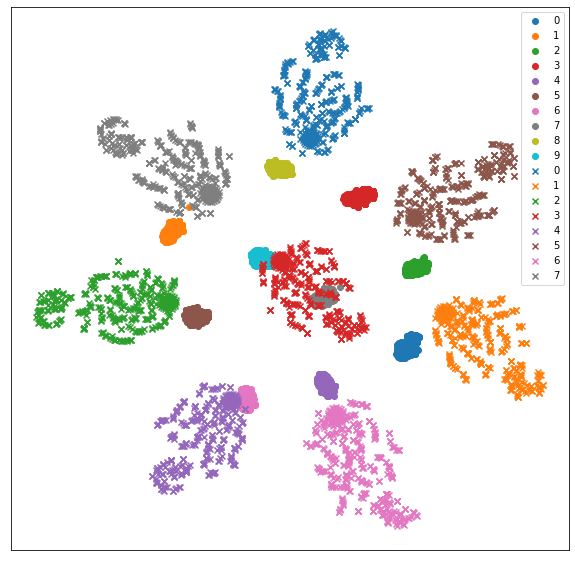

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.models import Model


# Get the output of the last convolutional layer
layer_output = Model(inputs=model.input, outputs=model.get_layer(model.layers[-1].name).output)

# Use the model to predict on the first dataset
features1 = layer_output.predict(train1)
predictions1 = model.predict(train1)

# Use the model to predict on the second dataset
features2 = layer_output.predict(train2)
predictions2 = model.predict(train2)

# Convert the features to a 2D representation using t-SNE
tsne = TSNE(n_components=2, random_state=0)
features_2d1 = tsne.fit_transform(features1.reshape((len(features1), -1)))
features_2d2 = tsne.fit_transform(features2.reshape((len(features2), -1)))

# Plot the t-SNE representation of the features
plt.figure(figsize=(10, 10))

# Plot the first dataset
prediction_labels1 = np.argmax(predictions1, axis=1)
for class_id in np.unique(prediction_labels1):
    class_mask = prediction_labels1 == class_id
    plt.scatter(features_2d1[class_mask, 0], features_2d1[class_mask, 1], marker='o', label=f'{class_id}')

# Plot the second dataset
prediction_labels2 = np.argmax(predictions2, axis=1)
for class_id in np.unique(prediction_labels2):
    class_mask = prediction_labels2 == class_id
    plt.scatter(features_2d2[class_mask, 0], features_2d2[class_mask, 1], marker='x', label=f'{class_id}')

plt.legend()
plt.yticks([])
plt.xticks([])
#plt.show()
# plt.axis('off')
plt.savefig("tsne_resnet50_200K_DP.png", bbox_inches='tight',dpi=300)
